# AEROSP 520 Compressible Flow: Homework 2
Jason Chen

## Problem 2
Air is composed of 21% (by volume) of oxygen molecule O2, 78% of nitrogen molecule N2, and the remaining 1% by argon Ar.
### Part (a)
Since we are given air's composition by volume, we want to compute the ratios by mass (since that is how we will be able to work with mass-specific internal energy and specific gas constants which are inherently by mass). We will assume that the volume ratios are equal to the molar ratios (for an ideal mixture this is generally true), and therefore we can go through the molecular weights to find the mass ratios. We get:
$$
O_2 = 23.2 \%, N_2 = 75.4 \%, Ar = 1.4 \%
$$
Since we are at equilibrium, we have a single notion of temperature and the expression for internal energy (for this TPG as it is only a function of temperature) is given by:

$$
e(T) = \left[ \frac{5}{2}R_{O2}T + \frac{5}{2}R_{N2}T + \frac{3}{2}R_{Ar}T \right] + \left[ \frac{\Theta_v R_{O2}}{e^{\Theta_v/T}-1} + \frac{\Theta_v R_{N2}}{e^{\Theta_v/T}-1} \right]
$$

Note that the term encased in square brackets on the left is the sum of the translational + rotational modes for all species, which will be mass-weighted by their concentration. The term on the right is for the vibrational modes, which only exist for oxygen and nitrogen.

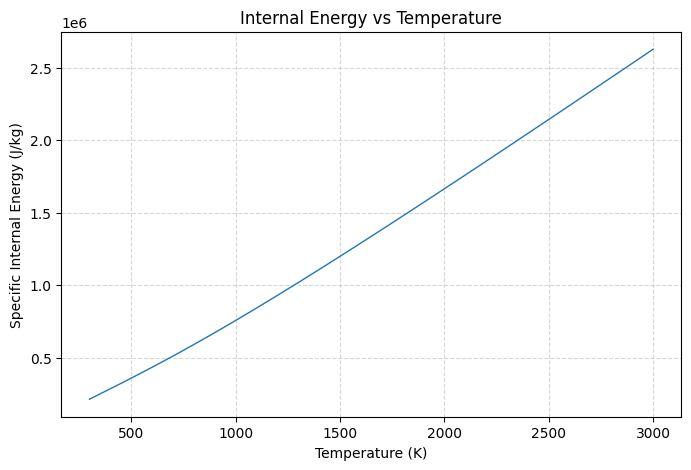

In [295]:
import numpy as np
import matplotlib.pyplot as plt

T = np.linspace(300, 3000, 1000)
theta_v_o2, theta_v_n2 = 2256, 3390
Ru = 8.314
R_o2, R_n2, R_ar = (Ru/32) * 1e3, (Ru/28) * 1e3, (Ru/40) * 1e3
x_o2, x_n2, x_ar = 0.232, 0.754, 0.014
e_tr_rot = ((5/2)*R_o2*T*x_o2 + (5/2)*R_n2*T*x_n2 + (3/2)*R_ar*T*x_ar)
e_vib = x_o2*R_o2*theta_v_o2/(np.exp(theta_v_o2/T)-1) + x_n2*R_n2*theta_v_n2/(np.exp(theta_v_n2/T)-1)
e_total = e_tr_rot + e_vib

plt.figure(figsize=(8,5))
plt.plot(T, e_total, linewidth=1)
plt.xlabel('Temperature (K)')
plt.ylabel('Specific Internal Energy (J/kg)')
plt.title('Internal Energy vs Temperature')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Part (b)
For the thermalized nonequilibrium case, we can use the same equation as above but instead use a separate $T_v$ and $T_t = T_r$. We will normalize the total specific internal energy by the energy we would get assuming the translational temperature $T_t$.

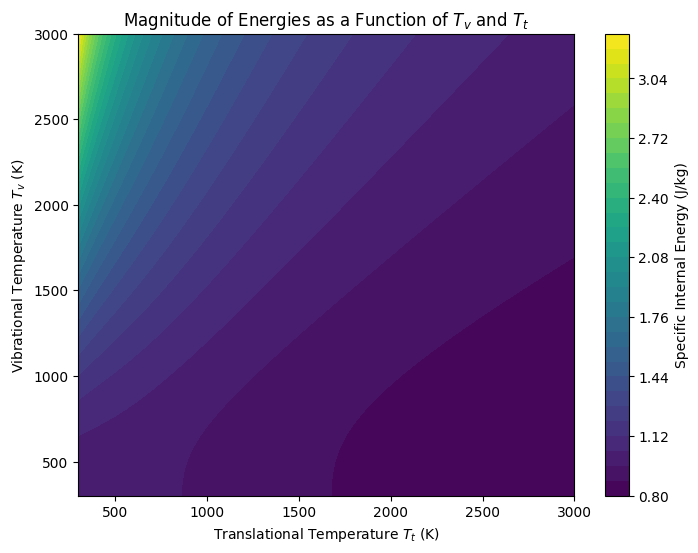

In [296]:
T_t = np.linspace(300, 3000, 1000)
T_v = np.linspace(300, 3000, 1000)
T_v_grid, T_t_grid = np.meshgrid(T_v, T_t)
# Calculate energies for each (T_v, T_t) pair
e_tr_rot = ((5/2)*R_o2*T_t_grid*x_o2 + (5/2)*R_n2*T_t_grid*x_n2 + (3/2)*R_ar*T_t_grid*x_ar)
e_vib = x_o2*R_o2*theta_v_o2/(np.exp(theta_v_o2/T_v_grid)-1) + x_n2*R_n2*theta_v_n2/(np.exp(theta_v_n2/T_v_grid)-1)
e_vib_with_T_t = e_tr_rot + x_o2*R_o2*theta_v_o2/(np.exp(theta_v_o2/T_t_grid)-1) + x_n2*R_n2*theta_v_n2/(np.exp(theta_v_n2/T_t_grid)-1)
e_grid = (e_tr_rot + e_vib) / e_vib_with_T_t
# Plot contour
plt.figure(figsize=(8,6))
contour = plt.contourf(T_t_grid, T_v_grid, e_grid, levels=30, cmap='viridis')
plt.xlabel('Translational Temperature $T_t$ (K)')
plt.ylabel('Vibrational Temperature $T_v$ (K)')
plt.title('Magnitude of Energies as a Function of $T_v$ and $T_t$')
plt.colorbar(contour, label='Specific Internal Energy (J/kg)')
plt.show()


### Part (c)
To plot the Boltzmann distributions, we will need to consider each species separately since we do not have enough information to infer how the distribution would look for a mixture. We will assume mixture is at equilibrium so the given temperatures are $T = T_r = T_v$. The fraction for the rotational mode is:
$$
f_{B,r}(T) = \frac{g_J e^{-\frac{\epsilon_J}{k T}}}{Q_{rot}}
$$
The vibrational mode:
$$
f_{B,v}(T) = \frac{g_v e^{-\frac{\epsilon_v}{k T}}}{Q_{vib}}
$$

As a reminder, the Boltzmann fraction is the number of molecules in a specific energy state, while $Q$ is the partition function. For rotation:
$$
Q_{rot} = \frac{T}{\Theta_r}
$$
$g_J$ is the degeneracy of rotational state $J$, which is:
$$
g(J) = 2J + 1
$$
Finally, the energy of a molecule in a specific rotational energy level $J$:
$$
\epsilon_{rot} = BJ(J+1)
$$
where 
$$
B = \frac{h^2}{8\pi^2 I}, \Theta_r = \frac{h^2}{8\pi^2 I k}
$$
and $h$ is the Planck constant while $k$ is the Boltzmann constant. The moment of inertia is found by researching online for the bond length of oxygen and nitrogen, and using $I = \frac{m_1m_2}{m_1 + m_2}r_0^2$, or by using the table given in lecture for $\Theta_n$ and solving for it.

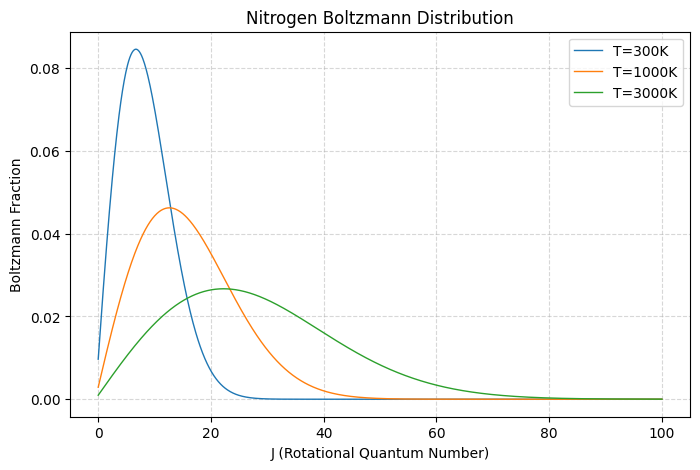

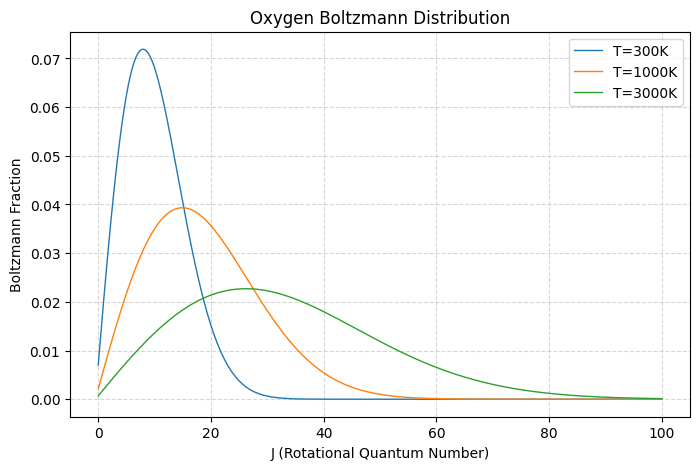

In [297]:
temperatures = [300, 1000, 3000]
J_values = np.linspace(0, 100, 1000)
v_values = np.linspace(0, 10, 1000)
theta_v = {'o2': {'v': 2270, 'r': 2.1}, 'n2': {'v': 3390, 'r': 2.9}}
h, k = 6.626e-34, 1.38e-23

for species in ['n2', 'o2']:
    plt.figure(figsize=(8,5))
    for T in temperatures:
        data = []
        for J in J_values:
            g = 2*J + 1
            theta_vi = theta_v[species]['r']
            I = (h**2)/(theta_vi * 8 * np.pi**2 * k)
            B = (h**2)/(8 * np.pi**2 * I)
            eps = B * J * (J + 1)
            Q_rot = T/theta_vi
            fraction = (g * np.exp(-eps/(k*T))) / Q_rot
            data.append(fraction)
        plt.plot(J_values, data, label=f'T={T}K', linewidth=1)
    plt.xlabel('J (Rotational Quantum Number)')
    plt.ylabel('Boltzmann Fraction')
    plt.title(('Oxygen' if species=='o2' else 'Nitrogen') + ' Boltzmann Distribution')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
plt.show()



For vibration:
$$
\epsilon_{vib} = h \nu \left( v+\frac{1}{2} \right)
$$
$$
g_{vib}(v) = 1
$$
$$
Q_{vib} = \frac{1}{1-e^{-\frac{\Theta_v}{T}}}
$$
$$
\Theta_v = \frac{h\nu}{k}
$$

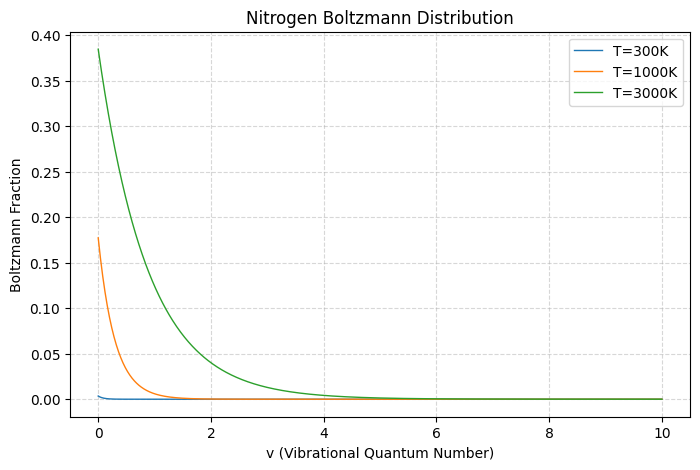

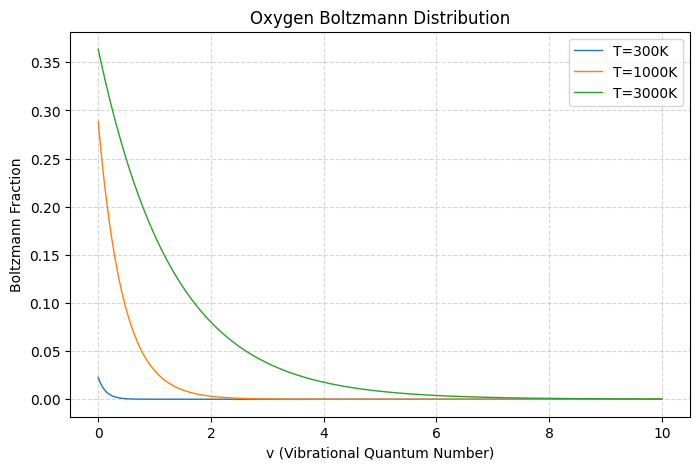

In [298]:
for species in ['n2', 'o2']:
    plt.figure(figsize=(8,5))
    for T in temperatures:
        data = []
        for v in v_values:
            g = 1
            theta_vi = theta_v[species]['v']
            nu = (theta_vi * k)/h
            eps = (h * nu)*(v + 1/2)
            Q_vib = 1 / (1 - np.exp(-theta_vi/T))
            fraction = (g * np.exp(-eps/(k*T))) / Q_vib
            data.append(fraction)
        plt.plot(v_values, data, label=f'T={T}K', linewidth=1)
    plt.xlabel('v (Vibrational Quantum Number)')
    plt.ylabel('Boltzmann Fraction')
    plt.title(('Oxygen' if species=='o2' else 'Nitrogen') + ' Boltzmann Distribution')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
plt.show()

### Part (d)
Plotting vibrational energy for the first 10 energy levels $v$, and rotational energy for the first 100 energy levels $J$:

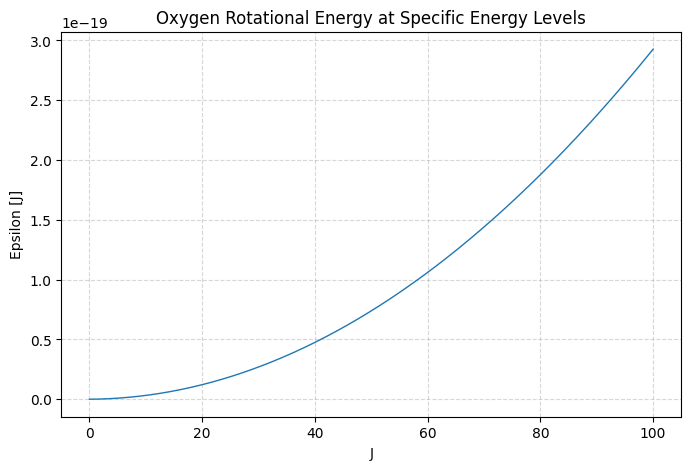

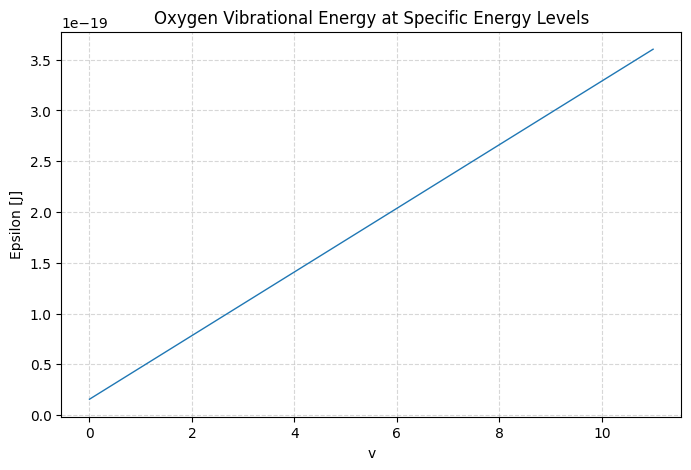

In [299]:
plt.figure(figsize=(8,5))
data = []
for J in J_values:
    theta_vi = theta_v['o2']['r']
    I = (h**2)/(theta_vi * 8 * np.pi**2 * k)
    B = (h**2)/(8 * np.pi**2 * I)
    eps = B * J * (J + 1)
    data.append(eps)
plt.plot(J_values, data, linewidth=1)
plt.xlabel('J')
plt.ylabel('Epsilon [J]')
plt.title('Oxygen Rotational Energy at Specific Energy Levels')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(8,5))
v_values = np.linspace(0, 11, 1000)
J_values = np.linspace(0, 101, 1000)
data = []
for v in v_values:
    theta_vi = theta_v['o2']['v']
    nu = (theta_vi * k)/h
    eps = (h * nu)*(v + 1/2)
    data.append(eps)
plt.plot(v_values, data, linewidth=1)
plt.xlabel('v')
plt.ylabel('Epsilon [J]')
plt.title('Oxygen Vibrational Energy at Specific Energy Levels')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Problem 3
Consider a gas mixture composed of 1% (by weight) molecular oxygen in an argon bath at an initial equilibrium condition (1) at a pressure and temperature of $P_1$ = 1 kPa and $T_1$ = 235.6 K, respectively. The gas mixture is initially at rest in a long tube until a shock wave moving at $W$ = 2000 m/s sweeps through it.

### Part (a)
To find how long it takes for the mixture to reach a state within 1% of the final equilibrium, we note that $\tau_v$ is the amount of time it takes for the state at the beginning of a vibrational relaxation process to reach $1/e$ of the original $E_v - E^*_v$, which is a metric for the "degree of relaxation" (since $E_v - E^*_v$ approaches zero at equilibrium). From lecture:

$$
p \tau_v = Ae^{\left(\frac{B}{T}\right)^{1/3}}
$$
We know oxygen to argon collisions are going to dominate (as opposed to oxygen-oxygen) since there is physically a lot more argon, and because the oxygen to argon collisions are less efficient at transferring energy into the vibrational modes. Thus, given this thermal bath assumption, we will only evaluate the relaxation time scale for coefficients of oxygen-argon collisions (as provided in lecture). We first solve for an initial $(p,T)$ state immediately after the shock (see Part (b) below), solve for $\tau_v$ in the equation above, and then determine how many multiples of $1/e$ it takes to reach 1% of the final equilibrium.

In [300]:
A = 3.58e-4 * 1e5
B = 2.95e6
p, T = 60921.8, 3797.6
tau_v = (A * np.exp((B/T)**(1/3))) / p
# Determine how many multiples of 1/e it takes to reach 1% (note the change of base)
n = np.log(0.01) / np.log(1/np.e)
print(f"Time to reach 1% of final equilibrium: {n*tau_v:.2f} microseconds")

Time to reach 1% of final equilibrium: 26.59 microseconds


$$ \boxed{t = 26.6 \textrm{ } \mu \textrm{s}} $$

### Part (b)
What is the temperature and pressure of the mixture right after the shock?

We are given the unsteady shock wave relations, relating the speed of the wave $W$ to $\gamma$ and pressure ratio $p_1/p_2$, and the temperature and pressure rise across the shock. If we rearrange them, we can find the $p, T$ right after the shock:

$$
\frac{p_2}{p_1} = \left[ \left( \frac{W}{a_1} \right)^2 - 1 \right] \left( \frac{2\gamma}{\gamma+1} \right) + 1
$$
where $a_1 = \sqrt{\gamma R T_1}$. We can compute the gas constant of the mixture using the molecular weights of argon and oxygen and computing a weighted average by mass. The $\gamma$ can be found easily given a calorically perfect gas assumption at the initial conditions (which is reasonable given the low pressure and moderate temperature). Argon is a monoatomic gas and so $\gamma = 5/3$, while oxygen is a diatomic gas and so $\gamma = 7/5$.

$$
R_{\textrm{mix}} = R_{\textrm{Ar}}(99 \%) + R_{\textrm{O2}}(1 \%) = 208.37 \textrm{ J/g/K}
$$
$$
\gamma_{\textrm{mix}} = \gamma_{\textrm{Ar}}(99 \%) + \gamma_{\textrm{O2}}(1 \%) = 1.664
$$
Thus, $a_1 = 285.8 \textrm{ m/s}$. Thus we can get the pressure ratio from the arranged equation above, and setting the temperature ratio from the provided formula, we get:
$$
\boxed{P_2 = 60.9 \textrm{ kPa, } T_2 = 3798 \textrm{ K}}
$$

In [301]:
W = 2000
p1 = 1e3
T1 = 235.6
Ru = 8.314
R_mix = ((Ru/40) * 0.99 + (Ru/32) * 0.01) * 1e3
gamma = (5/3) * 0.99 + (7/5) * 0.01
a_1 = np.sqrt(gamma * R_mix * T1)
print(f"Ratio of specific heats: {gamma:.3f} | Local speed of sound = {a_1:.1f} m/s")
p2_p1 = ((W/a_1)**2 - 1) * (2*gamma/(gamma+1)) + 1
T2_T1 = p2_p1 * (((gamma+1)/(gamma-1) + p2_p1)/(1 + (gamma+1)/(gamma-1)*p2_p1))
print(f"p2: {p2_p1*p1:.1f} Pa | T2: {T2_T1*T1:.1f} K")

Ratio of specific heats: 1.664 | Local speed of sound = 285.8 m/s
p2: 60921.8 Pa | T2: 3797.6 K


### Part (c)
To find the equilibrium state, we do not necessarily need to model the relaxation process, but rather we can solve for the end state given a couple assumptions. First, we know that right after the shock, all energy is stored in the translational and rotational modes. This total energy is constant through until the equilibrium point due to conservation of energy (adiabatic and no work done here). We are making an assumption here that the relaxation time scale for translation and rotation is much faster than the flow time scale, and that overall equilibrium can be reached. At equilibrium, we know that some of the internal energy will be stored in the vibrational mode, which is only present for oxygen. So:

$$
e_{\textrm{total}} = e_{\textrm{tr}} + e_{\textrm{rot}} + e_{\textrm{vib}} = \left(\frac{5}{2}R_{\textrm{O2}}T_2\right)(0.01) + \left(\frac{3}{2}R_{\textrm{Ar}}T_2\right)(0.99)
$$
This first equation uses the $T_2$ found in Part (b), and finds the translational + rotational modes contributed by oxygen and gives it a weight, and then sums it with the contribution from argon. Then, we can express the internal energy contribution of each species but with the vibrational mode included. Note that argon cannot have a vibrational mode because it is monoatomic.
$$
e_{\textrm{O2}}(T) = \frac{5}{2}RT + \frac{\Theta_v R}{e^{\Theta_v/T}-1}
$$
$$
e_{\textrm{Ar}}(T) = \frac{3}{2}RT
$$
Thus at equilibrium (we will denote this as state (4) to stay consistent with lecture), we can solve for temperature. We can only do this because there is only one notion of temperature (Boltzmann distribution, and at equilibrium):
$$
e_{\textrm{total}} = e_{\textrm{O2}}(0.01) + e_{\textrm{Ar}}(0.99) = \left( \frac{5}{2}R_{\textrm{O2}}T_4 + \frac{\Theta_v R_{\textrm{O2}}}{e^{\Theta_v/T_4}-1} \right)(0.01) + \frac{3}{2}R_{\textrm{Ar}}T_4 (0.99)
$$
We know the characteristic vibrational temperature $\Theta_v$ for oxygen from lecture is 2270 K. Solving for $T_4$ numerically, since an analytical solution is difficult to express:

In [302]:
from scipy.optimize import least_squares
R_o2, R_ar, theta_v = (Ru/32) * 1e3, (Ru/40) * 1e3, 2270
T2 = T2_T1 * T1
e_total = ((5/2) * R_o2 * T2) * 0.01 + ((3/2) * R_ar * T2) * 0.99
def function(T):
    T = T[0]
    eq1 = ((5/2)*R_o2*T + (theta_v * R_o2)/(np.exp(theta_v/T)-1))*(0.01) + ((3/2)*R_ar*T)*(0.99) - e_total
    return [eq1]
result = least_squares(function, x0=[T2])
print(f"T4: {result.x[0]:.1f} K")

T4: 3774.9 K


We can see that this relaxed temperature is within 1% of the temperature immediately downstream of the shock, and this is expected; in a thermal bath, it is by design that the relaxation will keep the temperature essentially constant since the proportion of molecules able to store energy in the vibrational modes is so small. 

From this result, it is thus also valid to say that $P_2 \approx P_4$, so we will say that $P_4 = 61 \textrm{ kPa}$. To find the speed of the wave, we can simply say that the speed of the wave must equal to the speed of the piston, which is given by the equation for $u_p$ given in the problem statement, due to conservation of momentum.

In [303]:
u_p = (a_1/gamma) * (p2_p1-1) * np.sqrt(((2*gamma)/(gamma+1)) / (p2_p1 + (gamma-1)/(gamma+1)))
print(f"Speed of the wave: {u_p:.1f} m/s")

Speed of the wave: 1470.8 m/s


So the final answer (because of the thermal bath assumption):
$$
\boxed{T_4 = 3798 \textrm{ K, } P_4 = 61 \textrm{ kPa, } u_{\textrm{wave}} = 1471 \textrm{ m/s}}
$$

### Part (d)
The answer changes significantly for a 50/50 mixture of oxygen and argon because the thermal bath assumption no longer holds.

#### Part (d)(a)
To find the relaxation time scale, we now consider oxygen-oxygen collisions be significant in the dynamics since they are much faster at transferring energy, while oxygen being more numerous means more time is required to relax all of it. There is a lack of information on how exactly to scale the rate equation based on two different relaxation processes happening at the same time, so the best we can do is to estimate that the rate will be governed by coefficients $A$ and $B$ also being weighted by the mass mixture ratio. This may not be completely rigorous without more information about the derivation of these constants, but it is the best that we can do. We cannot apply the rate equation directly however, since we cannot assume a constant temperature. See Part (d)(c) below for how the equilibrium was derived (it requires numeric integration), but to find the time to reach 1% of final equilibrium, we simply index into our time data for when pressure and temperature reach within 1% of the equilibrium, yielding:

$$
\boxed{t = 39.8 \textrm{ }\mu\textrm{s}}
$$

Again, **this is assuming** our relatively arbitrary equilibrium threshold being defined as when $e_v - e_v^* \leq 1 \times 10^{-3}$.

#### Part (d)(b)
We can simply recompute the unsteady shock relations with a new mixture ratio:

In [304]:
W = 2000
p1 = 1e3
T1 = 235.6
Ru = 8.314
R_mix = ((Ru/40) * 0.5 + (Ru/32) * 0.5) * 1e3
gamma = (5/3) * 0.5 + (7/5) * 0.5
a_1 = np.sqrt(gamma * R_mix * T1)
print(f"Ratio of specific heats: {gamma:.3f} | Local speed of sound = {a_1:.1f} m/s")
p2_p1 = ((W/a_1)**2 - 1) * (2*gamma/(gamma+1)) + 1
T2_T1 = p2_p1 * (((gamma+1)/(gamma-1) + p2_p1)/(1 + (gamma+1)/(gamma-1)*p2_p1))
print(f"p2: {p2_p1*p1:.1f} Pa | T2: {T2_T1*T1:.1f} K")

Ratio of specific heats: 1.533 | Local speed of sound = 290.6 m/s
p2: 57111.3 Pa | T2: 3057.1 K


#### Part (d)(c)
To find the equilibrium state after the shock, we cannot make the thermal bath assumption like we did in the previous Part (c) and therefore need to integrate the differential equation of how vibrational energy changes over time. We will still use the total energy argument as we did before (all energy being in the translational and rotational modes inititally, and that it is conserved), and will use it to update $e_v$ and $\tau_v$ at every time point:

$$
\frac{de_v}{dt} = -\frac{e_v - e_v^*(T)}{\tau_v(p, T)}
$$
$$
e_v^*(T) = \frac{\Theta_v/T}{e^{\Theta_v/T}-1} RT
$$
$$
p \tau_v = Ae^{\left(\frac{B}{T}\right)^{1/3}}
$$
$$
e_{\textrm{total (initial)}} = e_{\textrm{tr}} + e_{\textrm{rot}} = \left(\frac{5}{2}R_{\textrm{O2}}T_2\right)(0.5) + \left(\frac{3}{2}R_{\textrm{Ar}}T_2\right)(0.5)
$$
During the integration process, at any time $t$:
$$
e_{\textrm{total}} = e_{\textrm{total (initial)}} = e_{\textrm{tr}} + e_{\textrm{rot}} + e_{\textrm{vib}} = \left(\frac{5}{2}R_{\textrm{O2}}T\right)(0.5) + \left(\frac{3}{2}R_{\textrm{Ar}}T\right)(0.5) + e_v
$$
Initially, $e_v = 0$ and we know the full thermodynamic state. We can use the Euler numerical integration method to get $e_{v\textrm{(t+1)}} = e_v + \Delta t \frac{de_v}{dt}$, where pressure is updated at every timestep using the ideal gas equation of state, $p = \rho R_{\textrm{mix}} T$. We are assuming density is constant throughout the relaxation process since the bath is of finite, unchanging volume, and there is no net mass flow rate in or out of this control volume. Ideal gas is valid due to the temperature and pressure regime we are in, as previously mentioned.

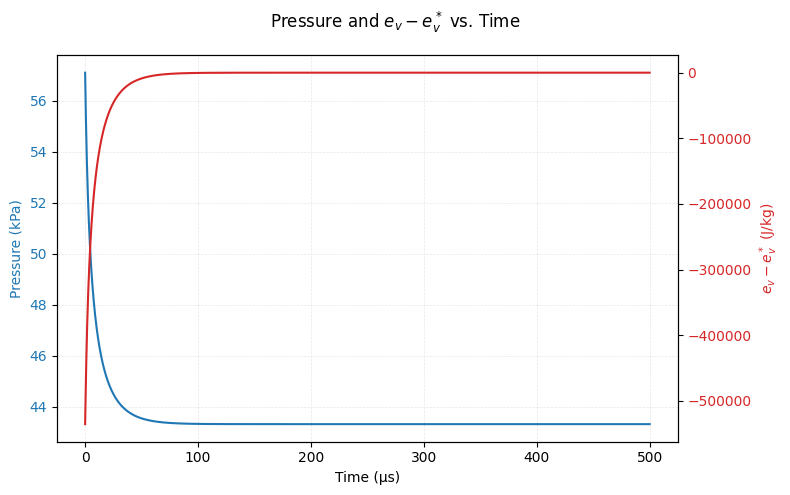

In [305]:
import pandas as pd
import matplotlib.pyplot as plt

p0, T0, theta_v = 57111.3, 3057.1, 2270
rho0 = p0 / (R_mix * T0)
e_total = ((5/2) * R_o2 * T0) * 0.5 + ((3/2) * R_ar * T0) * 0.5
A = ((5.42e-5 * 0.5) + (3.58e-4 * 0.5)) * 1e5 / 1e6  # Units of Pa-s
B = 2.95e6
ts = 0.1e-6
time = np.arange(0, 500e-6, ts)

def get_e_vstar(T): return (theta_v/T)/(np.exp(theta_v/T)-1) * R_o2 * T

results = pd.DataFrame(columns=["P", "T", "e_v", "e_vstar"], index=np.arange(len(time)))
results.iloc[0] = [p0, T0, 0.0, get_e_vstar(T0)]
for i in range(1, len(time)):
    # Get the derivative given the previous state properties
    T_prev, p_prev = results.iloc[i-1]["T"], results.iloc[i-1]["P"]
    e_vstar = get_e_vstar(T_prev)
    tau_v = (A * np.exp((B/T_prev) ** (1/3))) / p_prev
    de_dt = -(results.iloc[i-1]["e_v"] - e_vstar) / tau_v
    # Apply Euler method
    e_v = results.iloc[i-1]["e_v"] + de_dt * ts
    # Use e_v and total energy to update T
    T = (e_total - e_v) / ((5/2) * R_o2 * 0.5 + ((3/2) * R_ar * 0.5))
    # Update pressure
    P = rho0 * R_mix * T
    # Store current state
    results.iloc[i] = [P, T, e_v, e_vstar]

# Plotting
fig, ax1 = plt.subplots(figsize=(8,5))
time_us = time * 1e6
color1 = 'tab:blue'
ax1.set_xlabel('Time (μs)')
ax1.set_ylabel('Pressure (kPa)', color=color1)
ax1.plot(time_us, results['P'] * 1e-3, color=color1, label='Pressure (kPa)')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)

ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel(r'$e_v - e_v^*$ (J/kg)', color=color2)
ax2.plot(time_us, results['e_v'] - results['e_vstar'], color=color2, label=r'$e_v - e_v^*$')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False)

fig.suptitle('Pressure and $e_v - e_v^*$ vs. Time')
fig.tight_layout()
plt.show()


On inspection, this plot makes intuitive sense as $e_v$ is initially much smaller than $e_v^*$ (which by definition is higher since it is the vibrational internal energy evaluated as if it was active at the current temperature), but converges to zero. We don't have a concrete definition of equilibrium numerically, so we will make one here: we will assume that equilibrium is defined when $e_v - e_v^* \leq 1 \times 10^{-3}$. Using this definition, it means we take:

In [306]:
i = np.where(np.asarray(abs(results['e_v'] - results['e_vstar'])) < 1e-3)[0][0]
print(f"Equilibrium reached at time = {time[i]*1e6:.1f} microseconds")
T_eq, P_eq = results.iloc[i]['T'], results.iloc[i]['P']
print(f"Pressure = {P_eq*1e-3:.1f} kPa | Temperature = {T_eq:.1f} K")

Equilibrium reached at time = 306.6 microseconds
Pressure = 43.3 kPa | Temperature = 2318.7 K


The speed of the wave changes due to a differing pressure ratio and gas composition, but is found in the same way as before:

In [307]:
p2_p1 = results.iloc[1]['P'] / 1e3
u_p = (a_1/gamma) * (p2_p1-1) * np.sqrt(((2*gamma)/(gamma+1)) / (p2_p1 + (gamma-1)/(gamma+1)))
print(f"Speed of the wave: {u_p:.1f} m/s")
i_1_percent = np.where(np.asarray(results['T']) <= T_eq / 0.99)[0][0]
print(f"Time to get within 1% of equilibrium: {time_us[i_1_percent]} microseconds")

Speed of the wave: 1541.5 m/s
Time to get within 1% of equilibrium: 39.8 microseconds


Thus, our final answer is:
$$
\boxed{P_{\textrm{eq}} = 43.3 \textrm{ kPa, } T_{\textrm{eq}} = 2318.7 \textrm{ K, } u_{\textrm{wave}} = 1541.5 \textrm{ m/s}}
$$